<a href="https://colab.research.google.com/github/gshah8/UCF/blob/master/Machine_Learning/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 1 

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.




###Loading data for Problems 1-4

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
#print(train_labels_original.shape)

###Functions to be used throughout the homework

In [0]:
def load_data_bias():
  
  #for reshaping and normalizing train and test images
  m = 60000
  n = 10000
  image_size = 28*28
  train_images = train_images_original.reshape((m, image_size))
  train_images = train_images.astype('float32') / 255
  test_images = test_images_original.reshape((n, image_size))
  test_images = test_images.astype('float32') / 255
  
  #for adding bias to train and test images
  train_images_b = np.c_[np.ones((m, 1)), train_images]
  test_images_b = np.c_[np.ones((n, 1)), test_images]
  
  #one-hot encoding for labels
  for i in range(m):
    train_labels[i][train_labels_original[i]] = 1
  for i in range(n):
    test_labels[i][test_labels_original[i]] = 1
  
  return train_images_b, train_labels,test_images_b, test_labels


def sigmoid(z):
  ans = 1/(1+np.exp(-z))
  return ans



## Problem 1
Use logistic regression with mean squared error loss.

In [0]:
train_images_b, train_labels,test_images_b, test_labels = load_data_bias()
#print(train_labels.shape)

In [0]:
#initializing weight and big_weight for 10 classifiers

np.random.seed(42)
initial_weight=np.zeros((image_size+1,1))
weight_10=np.zeros((image_size+1,10))
#weight_10.shape

In [0]:
epochs = 20
lr = 0.001
batch_size = 64
classifiers = 10

for j in range(classifiers):
  weight = initial_weight
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    train_labels_shuffled = train_labels[:,j][shuffled_indices]   
    for i in range(0,m,batch_size):
      x_i = train_images_b_shuffled[i:i+batch_size]
      y_i = train_labels_shuffled[i:i+batch_size]
      y_i = y_i.reshape((y_i.size,1))
      z = x_i.dot(weight)
      a = sigmoid(z)
      dlda = a-y_i
      dadz=a*(1-a)
      dzdw = x_i
      gradient = 1/batch_size * x_i.T.dot(dadz*dlda)
      weight = weight - lr * gradient
  weight_10[:,j] = weight.reshape(785,)
  

In [61]:
weight_10.shape

(785, 10)

In [62]:
z_pred = train_images_b[2].dot(weight_10)
a_pred = sigmoid(z_pred)
print(a_pred)
print("Prediction=",np.argmax(a_pred))
print("true_label = " , train_labels_original[2])
#train_acc = train_labels - y_predict

[0.19345586 0.07743006 0.27157083 0.28127237 0.61025647 0.21428655
 0.25739437 0.18951868 0.22155289 0.33045379]
Prediction= 4
true_label =  4


In [63]:
z_pred_test = test_images_b.dot(weight_10)
a_pred_test = sigmoid(z_pred_test)

a_pred_test_numb=np.argmax(a_pred_test,axis=1)
a_pred_test_numb.shape

np.sum(a_pred_test_numb==test_labels_original)/test_labels_original.shape[0]

0.8037

## Problem 2
Use logistic regression with binary cross entropy loss.

In [0]:
train_images_b, train_labels,test_images_b, test_labels = load_data_bias()

In [0]:
np.random.seed(42)
initial_weight=np.zeros((image_size+1,1))
weight_10=np.zeros((image_size+1,10))

In [0]:
epochs = 20
lr = 0.001
batch_size = 64
classifiers = 10

for j in range(classifiers):
  weight = initial_weight
  for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    train_labels_shuffled = train_labels[:,j][shuffled_indices]   
    for i in range(0,m,batch_size):
      x_i = train_images_b_shuffled[i:i+batch_size]
      y_i = train_labels_shuffled[i:i+batch_size]
      y_i = y_i.reshape((y_i.size,1))
      z = x_i.dot(weight)
      a = sigmoid(z)
      dlda = a-y_i
      dadz=a*(1-a)
      dzdw = x_i
      gradient = 1/batch_size * x_i.T.dot(dadz*dlda)
      weight = weight - lr * gradient
  weight_10[:,j] = weight.reshape(785,)

In [0]:
z_pred = train_images_b[2].dot(weight_10)
a_pred = sigmoid(z_pred)
print(a_pred)
print("Prediction=",np.argmax(a_pred))
print("true_label = " , train_labels_original[2])

In [0]:
z_pred_test = test_images_b.dot(weight_10)
a_pred_test = sigmoid(z_pred_test)

a_pred_test_numb=np.argmax(a_pred_test,axis=1)
a_pred_test_numb.shape

np.sum(a_pred_test_numb==test_labels_original)/test_labels_original.shape[0]

## Problem 3
- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

In [1]:
#Load data
import numpy as np
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#for reshaping and normalizing train and test images
m = 60000
n = 10000
image_size = 28*28
train_images = train_images_original.reshape((m, image_size))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((n, image_size))
test_images = test_images.astype('float32') / 255

In [0]:
#for adding bias to train and test images
train_images_b = np.c_[np.ones((m, 1)), train_images]
test_images_b = np.c_[np.ones((n, 1)), test_images]

In [4]:
#for adding bias to train and test labels. Doing something like one-hot encoding for labels
train_labels = np.zeros((m,10))
test_labels = np.zeros((n,10))

for i in range(m):
  train_labels[i][train_labels_original[i]] = 1
  
for i in range(n):
  test_labels[i][test_labels_original[i]] = 1
test_labels.shape

(10000, 10)

In [5]:
#for setting weight

np.random.seed(42)
#initial_weight = np.random.randn(image_size+1,10)
initial_weight = np.zeros((image_size+1,10))
weight_path_mgd = []
batch_size = 40
initial_weight

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:

def softmax(z):
  z_exp=np.exp(z)
  #rint(z_exp.shape)
  #rint(z_exp)
  total=np.sum(z_exp,axis=1)
  #rint(total.shape)
  #rint(total)
  return z_exp/total.reshape(z_exp.shape[0],1)

In [0]:
def test(z):
  z_exp=np.exp(z)
  total=np.sum(z_exp)
  return z_exp/total

In [0]:
#this is for linear regression. Change it for logistic regression

epochs = 20
lr = 0.001
weight = initial_weight

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    train_labels_shuffled = train_labels[shuffled_indices]
    for i in range(0, m, batch_size):
      train_images_b_i = train_images_b_shuffled[i:i+batch_size]
      train_labels_b_i = train_labels_shuffled[i:i+batch_size]
      z = train_images_b_i.dot(weight)

      #apply activation - softmax
      #z_exp = np.exp(z)
      #z_exp_sum = z_exp.sum(axis=1)
      #a = np.zeros((batch_size,10))
      #for j in range(len(z)):
      #  a[j] = z_exp[j] / z_exp_sum[j]
      a = softmax(z)
      
      
      #now loss - categorical cross entropy
      #loss = np.zeros((batch_size,1))
      #for j in range(len(z)):
      #  loss[j] = -1*train_labels[j].dot(np.log(a[j].T))
      
      #gradient descent - msgd
      #do we use the loss from above or directly use the gradient???
      #How to use loss cce to calculate gradient
      gradient = 1/batch_size * train_images_b_i.T.dot(a - train_labels_b_i)
      weight = weight - lr * gradient
      weight_path_mgd.append(weight) 
        
        
      #break
    #break
    
        #a = np.zeros((10,1))
        #for j in range(len(z)):
        #  a[j] = np.exp(z)

#print(z_exp_sum)
#print(z[0][0])
#print(z_exp[0][0])
#print(len(z))
#print(a.shape)

#sum_arr = np.zeros((64,1))
#sum_arr = a.sum(axis=1)
#print(sum_arr)
#print(loss)

        #gradient = 2/batch_size * xi.T.dot(xi.dot(weight) - yi)
        #weight = weight - lr * gradient
        #weight_path_mgd.append(weight)

In [9]:
weight

array([[-0.07994857,  0.16427201, -0.03615793, ...,  0.10580816,
        -0.25043564, -0.03665279],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
#For Training and Testing Accuracy

mt=test_labels_original.shape[0]
predicted_labels_test_raw=test(test_images_b.dot(weight))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)

(10000, 10)
(10000,)
(10000,)
Test acc=  0.8929


## Problem 4
Reimplement the network from Problem 3 entirely in Keras.

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
#train_images_original.shape

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)
#test_labels

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
#network.add(layers.Dense(28*28, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax',input_shape=(28 * 28,)))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.2842 - acc: 0.6944 - val_loss: 0.8124 - val_acc: 0.8321
Epoch 2/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.7151 - acc: 0.8415 - val_loss: 0.6076 - val_acc: 0.8631
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.5864 - acc: 0.8595 - val_loss: 0.5265 - val_acc: 0.8745
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.5250 - acc: 0.8680 - val_loss: 0.4807 - val_acc: 0.8807
Epoch 5/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.4875 - acc: 0.8741 - val_loss: 0.4510 - val_acc: 0.8852
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.4618 - acc: 0.8786 - val_loss: 0.4296 - val_acc: 0.8884
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

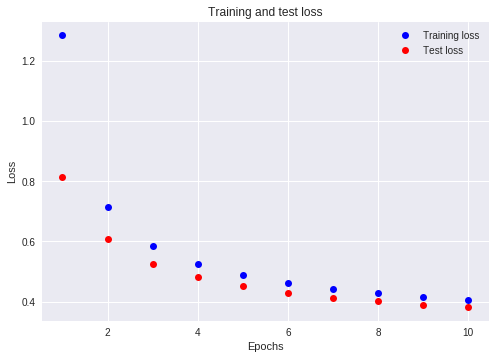

In [0]:

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###Add a plot for training and test loss

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

## Problem 5
Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).